In [4]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot

In [5]:
data = pd.read_csv("TSLA.csv")
data.head()
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,64.594124,65.883341,63.272302,64.642060,64.642060,3.979012e+07
std,33.400757,34.457933,32.308613,33.518742,33.518742,2.928062e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,3.540000e+06
25%,45.861999,46.425002,45.063001,45.887001,45.887001,2.158075e+07
50%,56.765999,57.888000,55.776001,56.945999,56.945999,3.081300e+07
75%,67.962001,69.039001,66.736000,67.790001,67.790001,4.658400e+07
max,281.002014,285.899994,270.256012,278.855988,278.855988,3.046940e+08


In [6]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the datasetdata.head(5)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -107.131
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3216.14    0.00637013       647.391           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3329.62    0.00098566       272.901           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3350.19    0.00131829       352.677      0.3932      0.9961      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3362.84    0.00804137       1081.93      0.8741      0.8741      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       3373.14   0.000167672       196.981   3.497e-07       0.001      564  LS failed, Hessian reset 
     499        3382.2   0.000303687    

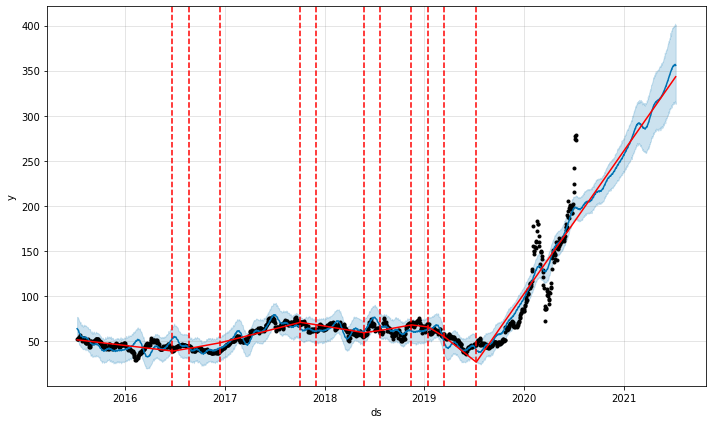

In [7]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Initial log joint probability = -107.131
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3197.85     0.0772856       703.796           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3279.16    0.00353753       224.377           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3332.13     0.0200183       588.818           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3349.03     0.0169505       493.457           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     482       3368.33   0.000118613       349.969   2.129e-07       0.001      652  LS failed, Hessian reset 
     499       3372.86   0.000677084    

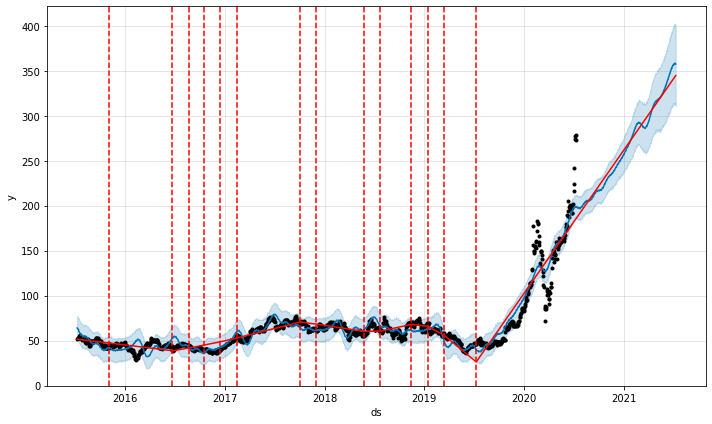

In [8]:
m = Prophet(daily_seasonality=True)
m.fit(data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -107.131
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3244.23     0.0314454       2497.06      0.1123           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3319.7     0.0446213       1685.74           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3347.99    0.00723025       668.285      0.7691      0.7691      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3370.29    0.00015958       204.799   9.809e-07       0.001      502  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     479          3378   0.000961916        497.57   3.363e-06       0.001      621  LS failed, Hessian reset 
     499       3

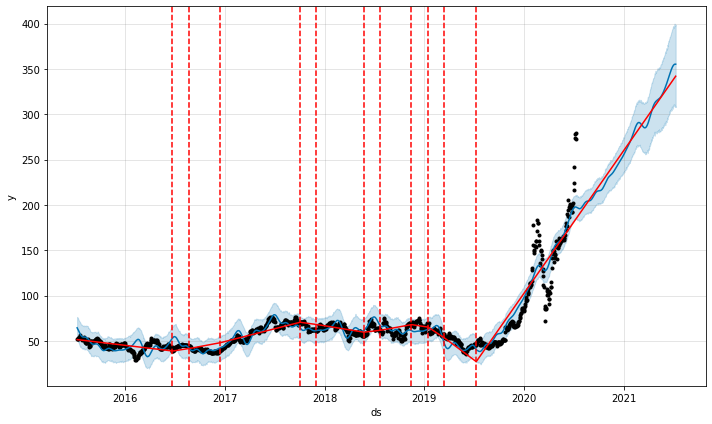

In [9]:
m = Prophet(weekly_seasonality=False)
m.fit(data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)